In [44]:
%load_ext autoreload
%autoreload 2

from utils import *
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from public_tests import *
from typing import Callable
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
plt.style.use('./deeplearning.mplstyle')
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# load the dataset
x_train, y_train = load_data()

In [46]:
x_train

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [47]:
x_train.shape

(97,)

In [48]:
y_train

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [49]:
y_train.shape

(97,)

In [50]:
type(x_train)

numpy.ndarray

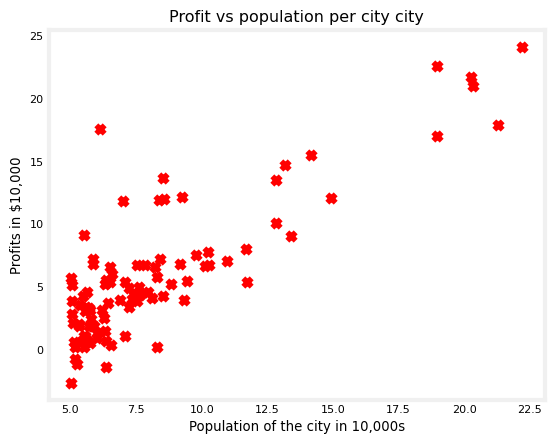

In [51]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profit vs population per city city")
plt.ylabel("Profits in $10,000")
plt.xlabel("Population of the city in 10,000s")
plt.show()

In [52]:
class model:
    def __init__(self, w=0.0, b=0.0):
        self.w = w
        self.b = b
    def __str__(self):
        return f"w = {self.w}, b={self.b}"

linear_model = model()
print(linear_model)

w = 0.0, b=0.0


In [53]:
def inference(population, the_model: model):
    predicted_profit = the_model.w * population + the_model.b
    return predicted_profit

In [75]:
def compute_cost(x: np.ndarray, y: np.ndarray, the_model: model) -> float:
    m = x.shape[0]
    
    predicted_profits = np.zeros(m)
    for i in range(m):
        predicted_profits[i] = inference(x[i], the_model)
    
    # squared_deviation = (predicted_profits - y)**2     # vector operation
    absolute_deviation = np.abs(predicted_profits - y)   # vector operation

    total_cost = 0
    for i in range(m):
        # total_cost += squared_deviation[i]
        total_cost += absolute_deviation[i]
    
    # total_cost /= (2*m)
    total_cost /= m

    return total_cost

In [76]:
compute_cost(x_train, y_train, linear_model)

np.float64(5.964178144329896)

In [77]:
linear_model_2 = model(2, 1)
cost = compute_cost(x_train, y_train, linear_model_2)
print(type(cost))
print(f"Cost at initial w: {cost:.3f}")

# Public tests
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 11.571


AssertionError: Case 3: Cost must be 15.325 for a perfect prediction but got 5.1

In [78]:
def compute_gradient(x: np.ndarray, y: np.ndarray, the_model: model) -> tuple:
    
    dj_dw = dj_db = 0
    m = x.shape[0]

    for i in range(m):
        diff = inference(x[i], the_model) - y[i]
        if diff:
            dj_db_i = diff / abs(diff)
            dj_dw_i = (diff / abs(diff)) * x[i]
        else:
            dj_db_i = 0
            dj_dw_i = 0

        # dj_db_i = diff
        # dj_dw_i = diff * x[i]

        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


In [79]:
# linear_model= model()

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, linear_model)
print(f"Gradient at initial w,b (zeros): ", tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w,b (zeros):  -7.709954639175261 -0.9175257731958762
Using X with shape (4, 1)


AssertionError: Case 1: dj_db is wrong: -1.0 != -2

In [80]:
linear_model_3 = model(0.2, 0.2)
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, linear_model_3)
print(f"Gradient at initial w,b (zeros): ", tmp_dj_dw, tmp_dj_db)

Gradient at initial w,b (zeros):  -5.736249484536085 -0.5876288659793815


In [81]:
def gradient_descent(x: np.ndarray, y: np.ndarray, the_model: model, \
                    cost_function: Callable, gradient_function: Callable, alpha: float, num_iters: int) -> tuple:
    
    m = x.shape[0]

    J_history = []
    w_history = []
    # w = the_model.w
    # b = the_model.b
    flexi_model = copy.deepcopy(the_model)

    J_history.append(cost_function(x, y, flexi_model))

    for i in range(num_iters):
        # print(flexi_model.w, flexi_model.b)
        # print(cost_function(x, y, flexi_model))
        
        dj_dw, dj_db = gradient_function(x, y, flexi_model)
        flexi_model.w = flexi_model.w - (alpha * dj_dw)
        flexi_model.b = flexi_model.b - (alpha * dj_db)

        if i < 100000:     # prevent resource exhausion
            J_history.append(cost_function(x, y, flexi_model))

        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(flexi_model.w)
            print(f"Iteration: {i:4} :: Cost: {float(J_history[-1]):8.2f}")

    return flexi_model, J_history, w_history

In [82]:
final_linear_model = model()

alpha = 0.01
iterations = 6000

final_linear_model, _, _ = gradient_descent(x_train, y_train, final_linear_model, compute_cost, compute_gradient, alpha, iterations)

print("w and b found by gradient discent: ", final_linear_model.w, final_linear_model.b)

Iteration:    0 :: Cost:     5.39
Iteration:  600 :: Cost:     2.45
Iteration: 1200 :: Cost:     2.29
Iteration: 1800 :: Cost:     2.23
Iteration: 2400 :: Cost:     2.20
Iteration: 3000 :: Cost:     2.17
Iteration: 3600 :: Cost:     2.16
Iteration: 4200 :: Cost:     2.15
Iteration: 4800 :: Cost:     2.15
Iteration: 5400 :: Cost:     2.15
w and b found by gradient discent:  1.1697814226804724 -4.194226804123914


In [83]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = inference(x_train[i], final_linear_model)

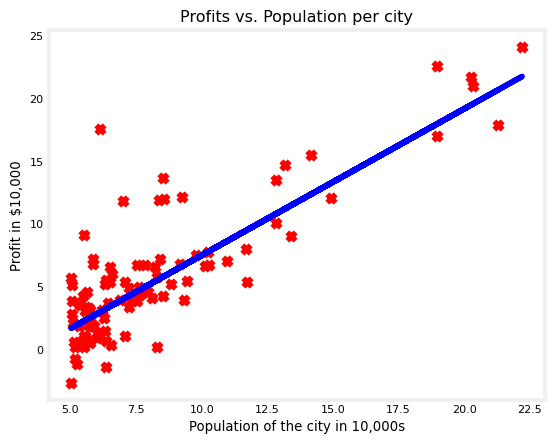

In [84]:
plt.plot(x_train, predicted, c = "b")
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of the city in 10,000s")
plt.show()

In [64]:
predict1 = 3.5 * final_linear_model.w + final_linear_model.b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * final_linear_model.w + final_linear_model.b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4251.31
For population = 70,000, we predict a profit of $41914.98


In [25]:
# MSE Cost Function
def compute_cost_mse(x: np.ndarray, y: np.ndarray, the_model: model) -> float:
    """
    Compute cost using Mean Squared Error (MSE)
    """
    m = x.shape[0]
    
    predicted_profits = np.zeros(m)
    for i in range(m):
        predicted_profits[i] = inference(x[i], the_model)
    
    squared_deviation = (predicted_profits - y)**2     # vector operation

    total_cost = 0
    for i in range(m):
        total_cost += squared_deviation[i]
    
    total_cost /= (2*m)  # MSE uses 1/2m normalization

    return total_cost

In [26]:
# MSE Gradient Function
def compute_gradient_mse(x: np.ndarray, y: np.ndarray, the_model: model) -> tuple:
    """
    Compute gradient using Mean Squared Error (MSE)
    """
    dj_dw = dj_db = 0
    m = x.shape[0]

    for i in range(m):
        diff = inference(x[i], the_model) - y[i]
        dj_db_i = diff
        dj_dw_i = diff * x[i]

        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [32]:
# Train models with both MAE and MSE
print("Training with MAE (Mean Absolute Error)...")
mae_model = model()
alpha = 0.01
iterations = 40

mae_model, mae_J_history, mae_w_history = gradient_descent(
    x_train, y_train, mae_model, compute_cost, compute_gradient, alpha, iterations
)

print("\nTraining with MSE (Mean Squared Error)...")
mse_model = model()

mse_model, mse_J_history, mse_w_history = gradient_descent(
    x_train, y_train, mse_model, compute_cost_mse, compute_gradient_mse, alpha, iterations
)

print(f"\nFinal MAE model: w={mae_model.w:.4f}, b={mae_model.b:.4f}")
print(f"Final MSE model: w={mse_model.w:.4f}, b={mse_model.b:.4f}")

Training with MAE (Mean Absolute Error)...
Iteration:    0 :: Cost:     5.39
Iteration:    4 :: Cost:     3.84
Iteration:    8 :: Cost:     2.93
Iteration:   12 :: Cost:     2.69
Iteration:   16 :: Cost:     2.63
Iteration:   20 :: Cost:     2.63
Iteration:   24 :: Cost:     2.62
Iteration:   28 :: Cost:     2.62
Iteration:   32 :: Cost:     2.62
Iteration:   36 :: Cost:     2.62

Training with MSE (Mean Squared Error)...
Iteration:    0 :: Cost:     6.74
Iteration:    4 :: Cost:     5.89
Iteration:    8 :: Cost:     5.87
Iteration:   12 :: Cost:     5.85
Iteration:   16 :: Cost:     5.83
Iteration:   20 :: Cost:     5.81
Iteration:   24 :: Cost:     5.79
Iteration:   28 :: Cost:     5.77
Iteration:   32 :: Cost:     5.75
Iteration:   36 :: Cost:     5.74

Final MAE model: w=0.6832, b=0.0171
Final MSE model: w=0.8215, b=-0.1971


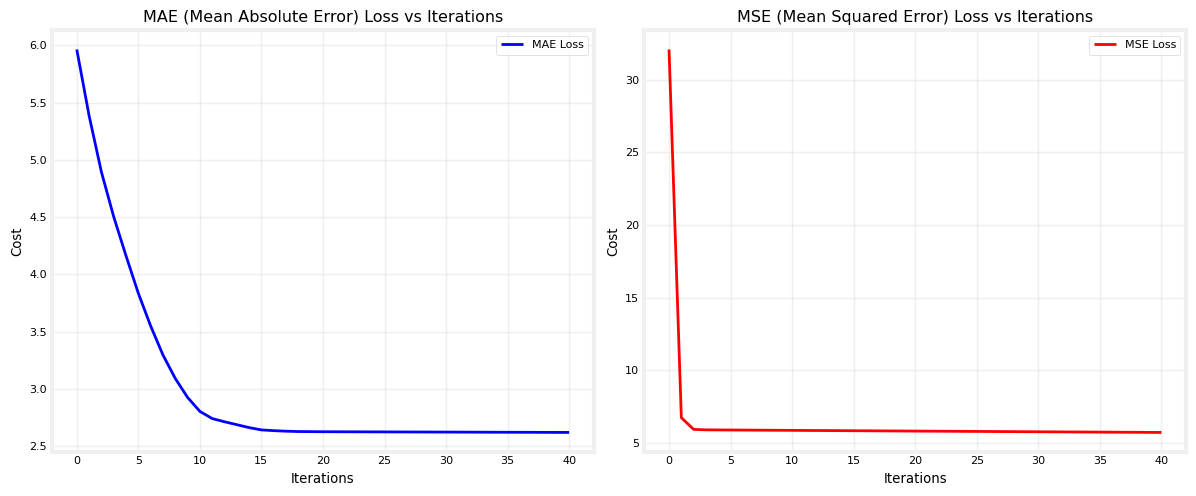

In [33]:
# Plot loss curves for both MAE and MSE
plt.figure(figsize=(12, 5))

# Plot MAE loss curve
plt.subplot(1, 2, 1)
plt.plot(mae_J_history, 'b-', linewidth=2, label='MAE Loss')
plt.title('MAE (Mean Absolute Error) Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot MSE loss curve
plt.subplot(1, 2, 2)
plt.plot(mse_J_history, 'r-', linewidth=2, label='MSE Loss')
plt.title('MSE (Mean Squared Error) Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

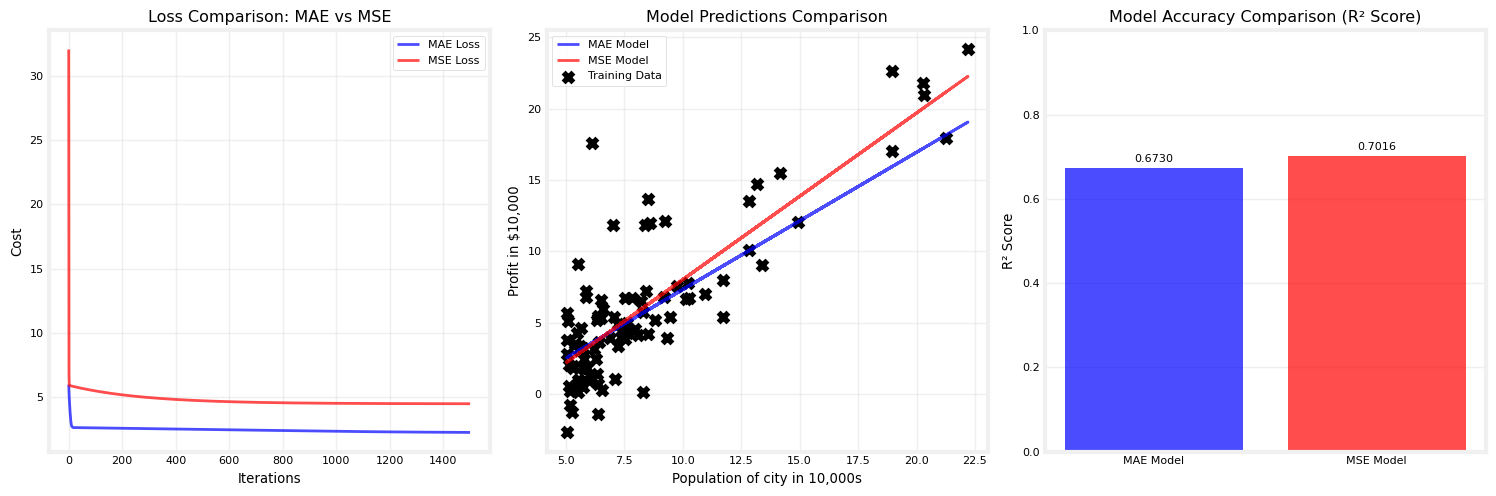


Model Performance Summary:
MAE Model - R² Score: 0.6730
MSE Model - R² Score: 0.7016
Final MAE Cost: 2.2486
Final MSE Cost: 4.4834


In [29]:
# Compare both models on the same plot
plt.figure(figsize=(15, 5))

# Compare loss curves
plt.subplot(1, 3, 1)
plt.plot(mae_J_history, 'b-', linewidth=2, label='MAE Loss', alpha=0.7)
plt.plot(mse_J_history, 'r-', linewidth=2, label='MSE Loss', alpha=0.7)
plt.title('Loss Comparison: MAE vs MSE')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot both models' predictions
plt.subplot(1, 3, 2)
m = x_train.shape[0]

# MAE predictions
mae_predicted = np.zeros(m)
for i in range(m):
    mae_predicted[i] = inference(x_train[i], mae_model)

# MSE predictions
mse_predicted = np.zeros(m)
for i in range(m):
    mse_predicted[i] = inference(x_train[i], mse_model)

plt.plot(x_train, mae_predicted, 'b-', linewidth=2, label='MAE Model', alpha=0.7)
plt.plot(x_train, mse_predicted, 'r-', linewidth=2, label='MSE Model', alpha=0.7)
plt.scatter(x_train, y_train, marker='x', c='black', s=50, label='Training Data')
plt.title('Model Predictions Comparison')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000')
plt.legend()
plt.grid(True, alpha=0.3)

# Calculate and compare accuracies (using R² score)
mae_predictions = np.array([inference(x_train[i], mae_model) for i in range(m)])
mse_predictions = np.array([inference(x_train[i], mse_model) for i in range(m)])

# R² score calculation
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

mae_r2 = r2_score(y_train, mae_predictions)
mse_r2 = r2_score(y_train, mse_predictions)

# Bar plot for accuracy comparison
plt.subplot(1, 3, 3)
models = ['MAE Model', 'MSE Model']
r2_scores = [mae_r2, mse_r2]
colors = ['blue', 'red']

bars = plt.bar(models, r2_scores, color=colors, alpha=0.7)
plt.title('Model Accuracy Comparison (R² Score)')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nModel Performance Summary:")
print(f"MAE Model - R² Score: {mae_r2:.4f}")
print(f"MSE Model - R² Score: {mse_r2:.4f}")
print(f"Final MAE Cost: {mae_J_history[-1]:.4f}")
print(f"Final MSE Cost: {mse_J_history[-1]:.4f}")